<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/commitit/ProjectCustomerChurn/blob/main/customer%20churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
 
</table>


## Project: Predicting Customer Churn of Bank ABC

* Below is the customer data of account holders at a Multinational Bank and the aim of the model will be to predict the Customer Churn to hold their customers for sustaining their business.



|Column   | used variable  |  Description |
|---|---|---|
| customer_id  |  no |Account number   |
|credit_score|yes   |  Credit Score |
|  country | yes   | Country of Residence   |
| gender  |  yes | Female/Male  |
|age|yes   |  Age of the client |
|tenure|yes   | How many years the client having a bank account at ABC Bank  |
| balance |  yes | Account balance of the client  |
| product_number  |  yes | Number of products from the bank  |
|credit_card|yes   |   Does the client have a credit card|
|active_member|yes   | Is the customer an active member of the bank  |
|  estimated_salary | yes  | How much is the estimated salary of the customer  |  
|  churn | yes  |  Boolean: 1 if the client has left the bank or 0 if the client is still with the bank  |  





In [571]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# processing libraries 
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [572]:
df = pd.read_csv('https://raw.githubusercontent.com/commitit/ProjectCustomerChurn/main/customer_churn')
df.sample(50)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
8275,15737489,610,Spain,Female,46,5,116886.59,1,0,0,107973.44,0
2739,15723894,625,France,Male,45,7,137555.44,1,0,0,124607.70,0
4535,15635034,727,Germany,Male,37,9,101191.83,1,1,1,34551.35,1
4759,15709222,557,Spain,Male,34,3,0.00,1,0,1,123427.98,0
9294,15574608,713,France,Male,36,8,133889.35,1,1,1,143265.65,0
2817,15768244,538,Spain,Female,30,8,0.00,2,1,1,41192.95,0
5273,15733904,529,France,Male,32,9,147493.89,1,1,0,33656.35,0
1253,15699523,499,Germany,Female,55,4,126817.65,2,1,0,123269.71,0
7805,15672499,635,France,Male,34,3,134692.40,2,1,1,83773.02,0
3099,15708196,696,Spain,Male,60,8,88786.81,1,1,1,196858.40,0


# Data Exploration

In [574]:
df.drop("customer_id", axis="columns", inplace=True) #inplace true will directly update the dataframe
df.dtypes #to check all datatypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [575]:
# check if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [576]:
# Alternatively, we can count the number of missing values in each column with the following:
print(df.isnull().sum())

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [577]:
df.country.values #to be converted to number representation
df["country"].value_counts() #counting the number of clients in each country

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [578]:
df["gender"].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [579]:
df.head(4).style.set_properties(**{"background-color": "greywhite","color": "black", "border-color": "black", "font-size":"9pt", 'width': 200})

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0


In [580]:
df.describe().style.set_properties(**{"background-color": "#greywhite","color": "black", "border-color": "black", "font-size":"8pt", 'width': 200})

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Visualization

* Checking how many loyal customers are leaving the bank?

In [583]:
df["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [584]:
df[df.churn==1]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


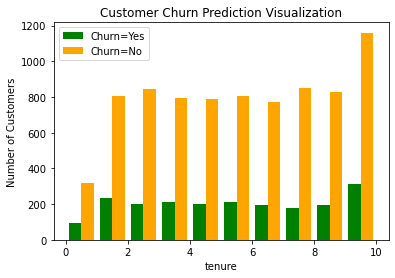

In [585]:
tenure_churn_no = df[df.churn==0].tenure #defining two new variables
tenure_churn_yes = df[df.churn==1].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color =["green", "orange"], label=["Churn=Yes", "Churn=No"])
plt.legend()

The longer the customer is with the bank, the more he remains with the bank (around 1200 customers, that stayed with the bank for more than 10y, are not leaving the bank and around 300 are leaving)

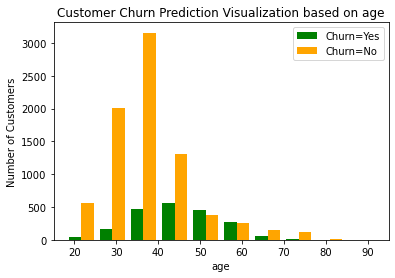

In [587]:
age_churn_no = df[df.churn==0].age #defining two new variables
age_churn_yes = df[df.churn==1].age

plt.xlabel("age")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization based on age")

plt.hist([age_churn_yes, age_churn_no], color =["green", "orange"], label=["Churn=Yes", "Churn=No"])
plt.legend()

* Between the age of 30-40 the churn rate is the lowest (around 5000 customers between the age of 30-40 are staying with the bank)
* Between the age of 40-50 the churn rate is the highest (around 1000 customers between the age of 40-50 are leaving the bank )

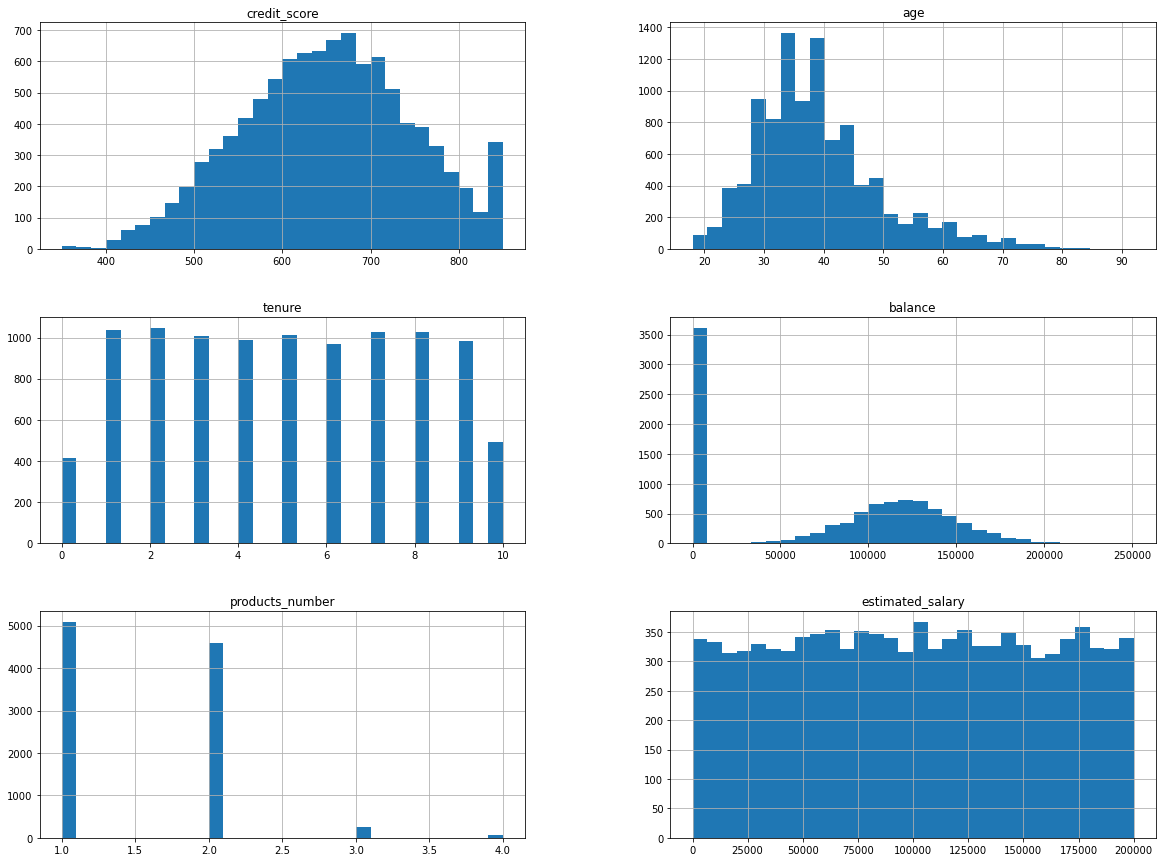

In [589]:
# Visualize the distribution of numeric features
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
df[numeric_features].hist(bins=30, figsize=(20, 15))
plt.show()

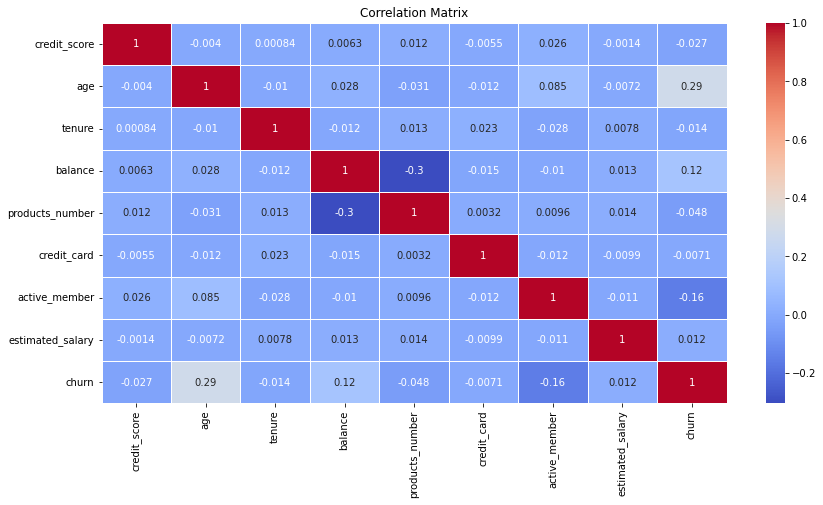

In [590]:
# correlation matrix using a heatmap
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The highest correlation, that we can see in the correlation matrix on top, are 
* churn and age with a correlation of 0.29 
* churn and balance with a correlation of 0.12
* churn and active_member with a correlation of -0.16

In [592]:
#Alternatively, we can check the correlation of the attributes as following:
corr_matrix = df.corr()
corr_matrix["churn"].sort_values(ascending=False)

churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64

In [593]:
def print_unique_col_value(df):
    for column in df: 
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}') #prints unique values in each column 

In [594]:
print_unique_col_value(df)

country : ['France' 'Spain' 'Germany']
gender : ['Female' 'Male']


In [595]:
#replace: gender in numerical representation: Female:1 and Male: 0

df["gender"].replace({"Female":1, "Male":0}, inplace=True)

In [596]:
df["gender"].unique()

array([1, 0])

In [597]:
#One Hot Encoding: Creates 3 columns

df=pd.get_dummies(df, columns=["country"])
df.columns
df.sample(4) #3 new columns for the three countries were created: Germany, France and Spain

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
3428,641,1,35,4,0.00,2,0,0,125986.18,0,1,0,0
7434,638,0,35,1,0.00,2,1,0,165370.66,0,0,0,1
5597,670,1,42,6,112333.63,1,1,1,65706.86,0,1,0,0
4133,704,0,33,3,0.00,2,1,0,73018.74,0,0,0,1


In [598]:
#Scale balance,estimated_salary, tenure and age to come to 0 and 1 range

cols_to_scale = ["tenure","balance", "estimated_salary", "credit_score", "age"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale]) 


In [599]:
df.sample(5)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
9332,0.720,1,0.594595,0.9,0.590735,1,1,0,0.242821,1,0,1,0
680,0.264,0,0.500000,0.5,0.387880,1,0,1,0.392060,0,1,0,0
8816,0.670,0,0.175676,0.7,0.488044,2,1,1,0.903876,0,0,0,1
9814,0.562,0,0.243243,0.1,0.000000,2,0,0,0.665712,0,1,0,0
2406,0.704,0,0.189189,0.8,0.285645,1,1,1,0.630413,0,0,0,1


In [600]:
#checking the unique values of all attributes
for col in df:
        print(f'{col}: {df[col].unique()}')

credit_score: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [601]:
df.dtypes #to check all datatypes

credit_score        float64
gender                int64
age                 float64
tenure              float64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_France        uint8
country_Germany       uint8
country_Spain         uint8
dtype: object

In [602]:
df1=df

In [643]:
df1.head() 

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1


# Build Machine Learning Model

In [607]:
x = df1.drop("churn", axis="columns") # (x is all columns except churn)
y = df1["churn"]

In [608]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)  

In [609]:
x_train.shape #80%

(8000, 12)

In [610]:
x_test.shape #20%

(2000, 12)

In [611]:
x_train[:10]

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
7751,0.800,1,0.283784,0.6,0.000000,2,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,2,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,1,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,2,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,2,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,1,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,2,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,1,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,1,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,1,1,0,0.567526,1,0,0


In [612]:
len(x_train.columns) #number of columns

12

In [613]:
# Installing TensorFlow and Keras
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [614]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
import tensorflow as tf

# Define your model using tf.keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_shape=(12,), activation="relu"),
    tf.keras.layers.Dense(11, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Assuming you have defined x_train and y_train
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.5086 - accuracy: 0.7960
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7991
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.8062
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8173
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8198
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8232
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8241
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8253
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8292
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8330

* Our Model accuracy is up to 86% with a loss function 0.35

In [616]:
model.evaluate (x_test, y_test) 

63/63 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8560


[0.35326406359672546, 0.8560000061988831]

In [617]:
z = model.predict(x_test)
z[:10] 

63/63 [==============================] - 0s 1ms/step


array([[0.0265766 ],
       [0.06242242],
       [0.04974213],
       [0.06430765],
       [0.05565522],
       [0.11403648],
       [0.0154079 ],
       [0.24909377],
       [0.01824055],
       [0.9380494 ]], dtype=float32)

* The array on top is a two dimensional array and needs to be converted to a one dimensional array, so if it is  1 if >0.5 and 0 if <0.5

In [619]:
y_pred=[]
for element in z:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [620]:
y_pred[:10] #one below should be 1 as well for 5658

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [621]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: churn, dtype: int64

In [622]:
#print classification report

from sklearn.metrics import confusion_matrix, classification_report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.75      0.43      0.55       405

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



* This result shows us the accuracy 0.86 and precision for 0 = 0.87, but for 1 = 0.75

Text(69.0, 0.5, 'Truth')

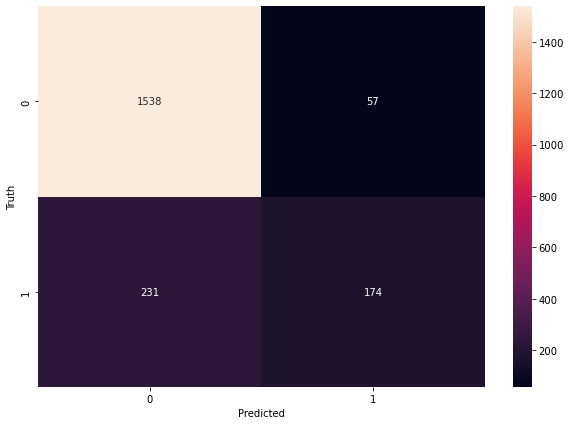

In [634]:
import seaborn as sn

#creating a confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

##### The confusion matrix shows us that  
1) when the Truth was 1, the model predicted 174 times 1
2) when the Truth was 0, the model predicted 1538 times 0

##### Error case: 
1) Although the truth was 1, it predicted wrongly 231 times 0
2) when the truth was 0, the model predicted 57 times 1



##### Calculcation of the accuracy of our ML Model

In [637]:
round((1538+110)/(1538+57+295+110),2)

0.66

##### Calculation of the precision for customer who actually stayed

In [639]:
round(1538/(1538+296),2)

0.84

##### Calculation of the precision for customer who actually churned

In [641]:
round(110/(110+57),2)

0.66